### Objective:  How do movie release dates vary by month, and what are the peak release times?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
file_path=('C:\\Users\Wanjiru\\OneDrive\Desktop\\Phase2_Project\\Phase-2-Movie-project--Group-9\\DataSets\\tmdb.movies.csv')
tmdb_df = pd.read_csv(file_path, index_col=0)

In [3]:
file_path = "C:\\Users\\Wanjiru\\OneDrive\\Desktop\\Phase2_Project\\Phase-2-Movie-project--Group-9\\DataSets\\bom.movie_gross.csv"
gross = pd.read_csv(file_path)

In [4]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
budget =pd.read_csv('C:\\Users\\Wanjiru\\OneDrive\\Desktop\\Phase2_Project\\Phase-2-Movie-project--Group-9\\DataSets\\tn.movie_budgets.csv')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   object        
 6   worlwide_gross     5782 non-null   int64         
 7   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 361.5+ KB


In [20]:
budget.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,5.037236e+01,2.882108e+01,1.0,25.00,50.0,75.0,1.000000e+02
production_budget,5782.0,3.158776e+07,4.181208e+07,1100.0,5000000.00,17000000.0,40000000.0,4.250000e+08
domestic_gross,5782.0,4.187333e+07,6.824060e+07,0.0,1429534.50,17225945.0,52348661.5,9.366622e+08
worlwide_gross,5782.0,9.148746e+07,1.747200e+08,0.0,4125414.75,27984448.5,97645836.5,2.776345e+09
release_month,5782.0,7.050675e+00,3.480147e+00,1.0,4.00,7.0,10.0,1.200000e+01


In [9]:
# Removing any non-numeric characters (like commas) and convert to float
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'].replace('[\$,]', '', regex=True))
budget['production_budget'] = pd.to_numeric(budget['production_budget'].replace('[\$,]', '', regex=True))
budget['worlwide_gross'] = pd.to_numeric(budget['worldwide_gross'].replace('[\$,]', '', regex=True))


In [10]:
#Checking for the sum of duplicates in the budgets dataset
budget.duplicated().sum()


0

In [12]:
# Remove any non-numeric characters (like commas) and convert to float
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'].replace('[\$,]', '', regex=True))
print(budget['domestic_gross'].dtype)

int64


## Analyzing Peak Release Times
Now, we’ll analyze the number of movies released in each month to identify peak release periods.

In [19]:
budget['release_date']= pd.to_datetime(budget['release_date'])
budget['release_month'] = budget['release_date'].dt.month
budget['release_month'].head()

0    12
1     5
2     6
3     5
4    12
Name: release_month, dtype: int64

In [14]:
# Count number of movies released each month
monthly_releases = budget['release_month'].value_counts().sort_index()
monthly_releases 


1     347
2     392
3     470
4     454
5     407
6     479
7     440
8     496
9     493
10    573
11    486
12    745
Name: release_month, dtype: int64

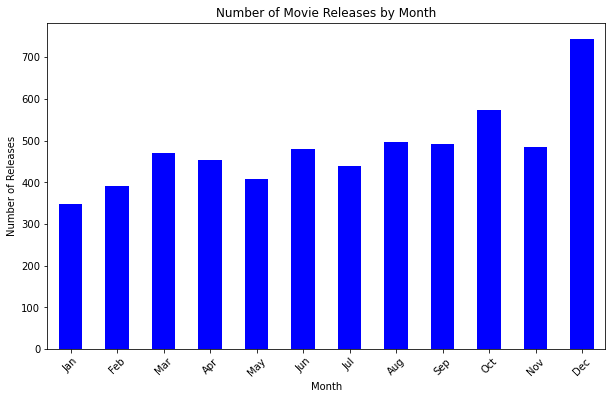

In [15]:
# Plot the number of releases per month
plt.figure(figsize=(10, 6))
monthly_releases.plot(kind='bar', color='blue')
plt.title('Number of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


## Analyzing Revenue by Month
We can further analyze the average box office revenue for movies released each month to see if there is a correlation between release timing and financial success.

In [16]:
# Group by release month and calculate average domestic gross
avg_revenue_per_month = budget.groupby('release_month')['domestic_gross'].mean()
avg_revenue_per_month

release_month
1     2.394962e+07
2     3.541465e+07
3     3.857299e+07
4     2.732840e+07
5     6.669795e+07
6     6.582791e+07
7     6.072804e+07
8     3.216821e+07
9     2.314989e+07
10    2.442350e+07
11    5.818117e+07
12    4.610082e+07
Name: domestic_gross, dtype: float64

## Statistical Analysis - Testing for Monthly Release Distribution Uniformity
If we want to determine if movies are uniformly released throughout the year, we can use a chi-square test. This test will help us see if the observed distribution of movie releases across months significantly deviates from a uniform distribution.

In [17]:
#Calculating Chi-square statistic
from scipy.stats import chisquare

# Perform chi-square test on the frequency of releases per month
observed_releases = monthly_releases.values
expected_releases = [monthly_releases.mean()] * 12  # Expected value for uniform distribution

chi_stat, p_value = chisquare(observed_releases, expected_releases)
print(f"Chi-square Statistic: {chi_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The distribution of movie releases across months is significantly different from uniform.")
else:
    print("The distribution of movie releases across months is not significantly different from uniform.")

Chi-square Statistic: 233.34555517122104, P-value: 8.493608319019405e-44
The distribution of movie releases across months is significantly different from uniform.


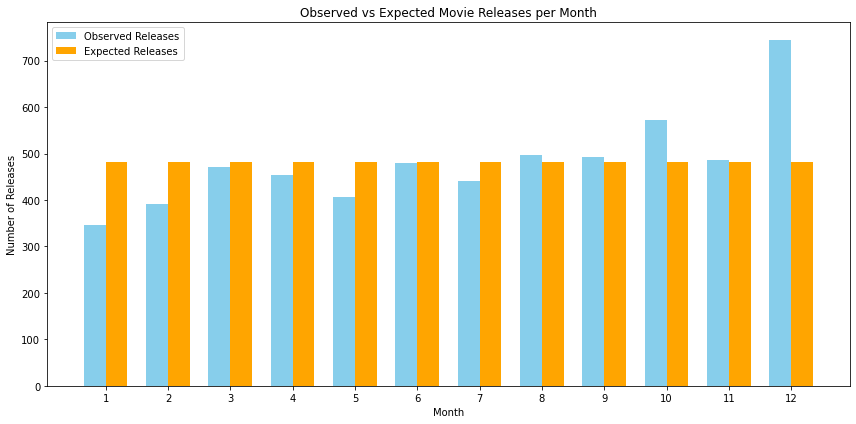

In [18]:
#Visual representation of the chi-square results
months = monthly_releases.index
bar_width = 0.35
x = np.arange(len(months))

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot observed releases as bars
plt.bar(x - bar_width/2, observed_releases, width=bar_width, label='Observed Releases', color='skyblue')

# Plot expected releases as bars
plt.bar(x + bar_width/2, expected_releases, width=bar_width, label='Expected Releases', color='orange')

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Observed vs Expected Movie Releases per Month")
plt.xticks(x, months)  # Set x-axis labels to month names
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### **Observation**
- The bar chart is comparing observed and expected monthly movie releases revealing noticeable deviations from a uniform distribution. Specifically, January shows significantly fewer releases than expected, while December has substantially more, suggesting seasonal trends. Smaller but consistent deviations are also visible in months like February, July, and August.
- The chi-square test yields a chi-square statistic of 233.35 and a p-value of 8.49e-44, which is far below the 0.05 significance threshold. This result confirms that the observed distribution of movie releases across months is statistically significantly different from a uniform (even) distribution. 

### **Recommendation** 
Given the statistically significant non-uniform distribution of releases, the company should consider optimizing its release schedule to match audience demand patterns. December and summer months (like July and August) appear to be peak times for releases, and scheduling major films during these months could capitalize on higher audience interest. 

Conversely, underutilized months like January may offer opportunities for niche or independent films to stand out with reduced competition, potentially attracting audiences looking for new content after the holiday season. Strategically aligning release timing with these observed trends could help maximize both visibility and revenue throughout the year.